# TensorFlow NN
- Sequential
- Functional
- Flow: Make the model, Complie, Fit, Predict, Evaluate, Visualization of loss and acc

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [2]:
X,y = make_circles(1000,noise=0.03)

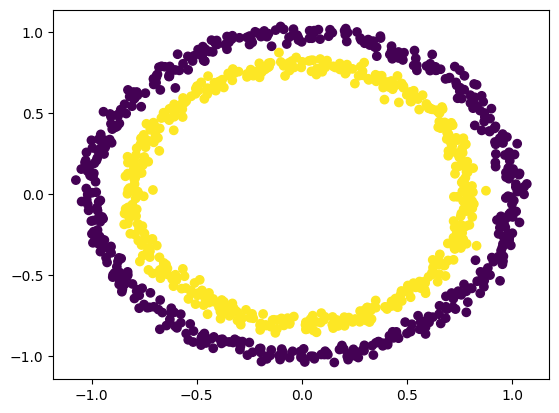

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [4]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(X,y,train_size=0.8)
print(x_train.shape,x_test.shape)

(800, 2) (200, 2)


In [6]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [6]:
# y_train = tf.one_hot(y_train,depth=2)
# y_test = tf.one_hot(y_test,depth=2)
# print(y_train.shape,y_test.shape)

In [28]:
# model = keras.Sequential([
#     keras.layers.Input(shape=(2,)),
#     keras.layers.Dense(10,activation='tanh'),
#     keras.layers.Dense(4,activation='tanh'),
#     keras.layers.Dense(1,activation='sigmoid')
# ])


# print(model.summary())


model = keras.Sequential()
model.add(keras.Input(shape=(2,)))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
print(model.summary())

model.compile(
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)
history = model.fit(x_train,y_train,batch_size=80,epochs=200,validation_data=(x_test,y_test))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 471 (1.84 KB)

 Trainable params: 471 (1.84 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5220 - loss: 0.6885 - val_accuracy: 0.4350 - val_loss: 0.7081
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5206 - loss: 0.6889 - val_accuracy: 0.4500 - val_loss: 0.7079
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4969 - loss: 0.6906 - val_accuracy: 0.4450 - val_loss: 0.7051
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5370 - loss: 0.6824 - val_accuracy: 0.4500 - val_loss: 0.7055
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5297 - loss: 0.6828 - val_accuracy: 0.4650 - val_loss: 0.7042
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5349 - loss: 0.6845 - val_accuracy: 0.5400 - val_loss: 0.7037
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6057 - loss: 0.6783 - val_accuracy: 0.4300 - val_loss: 0.7043
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5234 - loss: 0.6783 - val_accuracy: 0.43

In [29]:
model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0066 


[0.008247668854892254, 1.0]

In [30]:
ypred = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [31]:
ypred

array([[9.98717606e-01],
       [3.07181310e-02],
       [2.19245849e-04],
       [4.06911317e-03],
       [4.36301889e-05],
       [9.98798251e-01],
       [9.99430478e-01],
       [9.49311852e-01],
       [5.19020505e-05],
       [9.69971240e-01],
       [4.45040932e-05],
       [9.99696076e-01],
       [9.99837518e-01],
       [9.00181592e-04],
       [9.98697460e-01],
       [9.99934494e-01],
       [9.94199574e-01],
       [5.03866114e-02],
       [9.99576926e-01],
       [9.99989212e-01],
       [1.05328967e-04],
       [1.14829922e-02],
       [2.39357604e-07],
       [2.26433389e-03],
       [9.99470294e-01],
       [9.99627411e-01],
       [9.99714375e-01],
       [9.91357327e-01],
       [9.85016704e-01],
       [9.64085665e-03],
       [3.50933900e-04],
       [9.99899745e-01],
       [9.99904990e-01],
       [3.88125627e-05],
       [9.99894857e-01],
       [9.94417489e-01],
       [9.99840677e-01],
       [9.99944150e-01],
       [9.99972701e-01],
       [9.99476314e-01],


In [22]:
# np.argmax(ypred,axis = 1)
# ypred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step
doing binary classifcation...


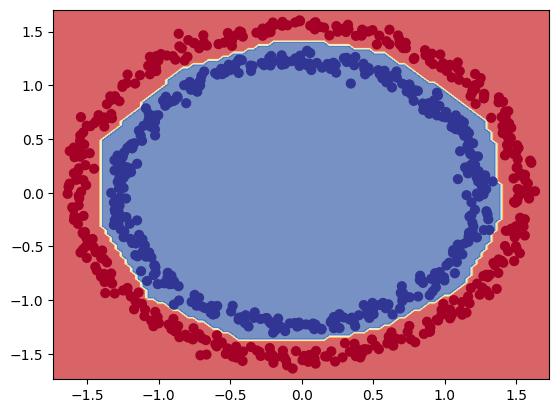

In [32]:
# plot_decision_boundary(model,x_train,np.argmax(y_train,axis=1))
plot_decision_boundary(model,x_train,y_train)

In [33]:
history.history

{'accuracy': [0.5024999976158142,
  0.5162500143051147,
  0.5137500166893005,
  0.5199999809265137,
  0.5362499952316284,
  0.5612499713897705,
  0.5737500190734863,
  0.5237500071525574,
  0.5287500023841858,
  0.5362499952316284,
  0.5462499856948853,
  0.5662500262260437,
  0.5787500143051147,
  0.5762500166893005,
  0.5799999833106995,
  0.5799999833106995,
  0.5787500143051147,
  0.5887500047683716,
  0.5837500095367432,
  0.5887500047683716,
  0.606249988079071,
  0.6262500286102295,
  0.6499999761581421,
  0.6412500143051147,
  0.6200000047683716,
  0.7212499976158142,
  0.7524999976158142,
  0.7825000286102295,
  0.7825000286102295,
  0.8424999713897705,
  0.8262500166893005,
  0.8650000095367432,
  0.8687499761581421,
  0.8999999761581421,
  0.9049999713897705,
  0.9300000071525574,
  0.9512500166893005,
  0.9424999952316284,
  0.9800000190734863,
  0.9599999785423279,
  0.9737499952316284,
  0.9762499928474426,
  0.9825000166893005,
  0.987500011920929,
  0.9900000095367432,


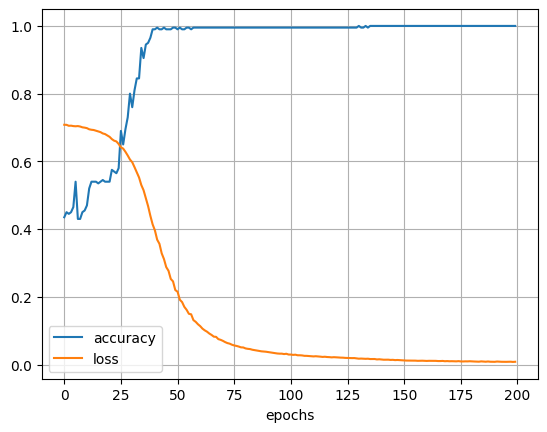

In [34]:
plt.plot(history.history['val_accuracy'],label = 'accuracy')
plt.plot(history.history['val_loss'],label = 'loss')

plt.legend()
plt.xlabel('epochs')
plt.grid()
plt.show()

In [35]:
model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0066 


[0.008247668854892254, 1.0]

In [36]:
model = keras.Sequential()
model.add(keras.Input(shape=(2,)))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(2,activation='softmax'))
print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)
history = model.fit(x_train,y_train,batch_size=80,epochs=100,validation_data=(x_test,y_test))

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 2)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70 (280.00 B)

 Trainable params: 70 (280.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4828 - loss: 0.7536 - val_accuracy: 0.5550 - val_loss: 0.7223
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4942 - loss: 0.7375 - val_accuracy: 0.5550 - val_loss: 0.7164
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4547 - loss: 0.7389 - val_accuracy: 0.5700 - val_loss: 0.7111
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4685 - loss: 0.7221 - val_accuracy: 0.5650 - val_loss: 0.7074
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4837 - loss: 0.7149 - val_accuracy: 0.5700 - val_loss: 0.7040
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4919 - loss: 0.7026 - val_accuracy: 0.5700 - val_loss: 0.7010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4689 - loss: 0.7129 - val_accuracy: 0.5650 - val_loss: 0.6989
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4621 - loss: 0.7083 - val_accuracy: 0.56

In [7]:
y_train = tf.one_hot(y_train,depth=2)
y_test = tf.one_hot(y_test,depth=2)
print(y_train.shape,y_test.shape)

(800, 2) (200, 2)


In [8]:
print(y_test)

tf.Tensor(
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]

In [9]:
model = keras.Sequential()
model.add(keras.Input(shape=(2,)))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(2,activation='softmax'))
print(model.summary())

model.compile(
    loss = keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)
history = model.fit(x_train,y_train,batch_size=80,epochs=100,validation_data=(x_test,y_test))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70 (280.00 B)

 Trainable params: 70 (280.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4664 - loss: 0.8865 - val_accuracy: 0.5400 - val_loss: 0.8064
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4618 - loss: 0.8232 - val_accuracy: 0.5300 - val_loss: 0.7846
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4691 - loss: 0.8162 - val_accuracy: 0.5100 - val_loss: 0.7673
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5066 - loss: 0.7644 - val_accuracy: 0.5000 - val_loss: 0.7549
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4902 - loss: 0.7663 - val_accuracy: 0.4650 - val_loss: 0.7454
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5094 - loss: 0.7477 - val_accuracy: 0.4550 - val_loss: 0.7390
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5074 - loss: 0.7333 - val_accuracy: 0.4750 - val_loss: 0.7351
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4966 - loss: 0.7319 - val_accuracy: 0.47

In [10]:
model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9787 - loss: 0.4211 


[0.4171268939971924, 0.9800000190734863]

In [11]:
ypred = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [12]:
ypred

array([[0.3569459 , 0.64305407],
       [0.7422763 , 0.2577237 ],
       [0.5547965 , 0.44520348],
       [0.38970166, 0.61029834],
       [0.35041142, 0.6495886 ],
       [0.23239972, 0.7676003 ],
       [0.77782446, 0.22217551],
       [0.28856114, 0.71143883],
       [0.38079304, 0.6192069 ],
       [0.7478101 , 0.25218984],
       [0.39206707, 0.607933  ],
       [0.5316763 , 0.4683237 ],
       [0.78311646, 0.21688354],
       [0.36381158, 0.63618845],
       [0.2685007 , 0.7314993 ],
       [0.36932546, 0.63067454],
       [0.29387772, 0.7061222 ],
       [0.19018514, 0.8098149 ],
       [0.61961454, 0.38038543],
       [0.47098935, 0.5290106 ],
       [0.4421732 , 0.55782676],
       [0.36261663, 0.6373834 ],
       [0.36497286, 0.6350271 ],
       [0.6210312 , 0.3789688 ],
       [0.36471313, 0.63528687],
       [0.7122334 , 0.2877666 ],
       [0.40237144, 0.59762853],
       [0.30677545, 0.69322455],
       [0.48157045, 0.51842946],
       [0.37857282, 0.62142724],
       [0.

In [13]:
np.argmax(ypred,axis=1)

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1], dtype=int64)

In [14]:
Input = keras.Input(shape=(2,))
x = layers.Dense(10,activation='relu')(Input)
x = layers.Dense(20,activation='relu')(x)
x = layers.Dense(10,activation='relu')(x)
output = layers.Dense(2,activation='softmax')(x)

model = keras.Model(inputs = Input, outputs = output)

print(model.summary())

model.compile(
    loss = keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)
history = model.fit(x_train,y_train,batch_size=80,epochs=100,validation_data=(x_test,y_test))

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 482 (1.88 KB)

 Trainable params: 482 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4484 - loss: 0.7149 - val_accuracy: 0.4950 - val_loss: 0.6943
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4931 - loss: 0.6939 - val_accuracy: 0.4800 - val_loss: 0.6970
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4965 - loss: 0.6911 - val_accuracy: 0.4200 - val_loss: 0.6986
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4883 - loss: 0.6893 - val_accuracy: 0.4250 - val_loss: 0.6978
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5011 - loss: 0.6852 - val_accuracy: 0.4350 - val_loss: 0.6967
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5125 - loss: 0.6803 - val_accuracy: 0.4400 - val_loss: 0.6951
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5099 - loss: 0.6870 - val_accuracy: 0.4800 - val_loss: 0.6935
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5412 - loss: 0.6822 - val_accuracy: 0.47

In [15]:
model.inputs

[<KerasTensor shape=(None, 2), dtype=float32, sparse=False, ragged=False, name=keras_tensor_7>]

In [16]:
model.outputs

[<KerasTensor shape=(None, 2), dtype=float32, sparse=False, ragged=False, name=keras_tensor_11>]

In [17]:
model.layers

[<InputLayer name=input_layer_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>,
 <Dense name=dense_6, built=True>]

In [18]:
model.layers[-2].output

<KerasTensor shape=(None, 10), dtype=float32, sparse=False, ragged=False, name=keras_tensor_10>

In [19]:
# new_model = keras.Model(inputs = model.inputs,
#                         outputs = model.get_layer('dense_6').output)
new_model = keras.Model(inputs = model.inputs,
                        outputs = [model.layers[-2].output,model.layers[-1].output])
print(new_model.summary())

features = new_model.predict(x_test)
# for feat in features:
#     print(feat.shape)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 482 (1.88 KB)

 Trainable params: 482 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

None
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


C:\Users\abhis\miniconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_7']
Received: inputs=Tensor(shape=(32, 2))
  warnings.warn(msg)
C:\Users\abhis\miniconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_7']
Received: inputs=Tensor(shape=(None, 2))
  warnings.warn(msg)


In [21]:
len(features)

2

In [24]:
features[0]

array([[0.16825953, 0.07990441, 0.33121866, ..., 0.25921658, 1.5264187 ,
        0.        ],
       [1.7098587 , 1.4205115 , 2.0278268 , ..., 1.2403027 , 0.7178371 ,
        0.        ],
       [0.9663187 , 0.8154602 , 1.0329725 , ..., 0.6758071 , 0.510267  ,
        0.        ],
       ...,
       [0.20356902, 0.12639111, 0.13951124, ..., 0.0020858 , 1.6922643 ,
        0.        ],
       [0.26379952, 0.04857835, 0.1184362 , ..., 0.05831948, 1.291224  ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.4381614 ,
        0.        ]], dtype=float32)

In [23]:
features[1].shape

(200, 2)